## Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. For many incumbent operators, retaining high profitable customers is the number one business goal.


## Business Objective
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 
## Solution
1) Using the 4 months of data, building the predictive models to identify customers at high risk of churn.

2) Identify the factors and respective weightage of the main indicators of churn.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# To split Train and Test
from sklearn.model_selection import train_test_split

# Model Building
import statsmodels.api as sm

# Confusion Metric based calculation
from sklearn import metrics

# RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# Precision and Recall
from sklearn.metrics import precision_score, recall_score

# Precision and Recall TradeOff

from sklearn.metrics import precision_recall_curve

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### In this section, following will be done:
- Data understanding and exploration
- Data cleaning
- Data preparation


In [2]:
# Loading the dataset
#-------------------------------------------------------
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
#shape of the dataset
#-------------------------------------------------------
telecom.shape

(99999, 226)

In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Check for any Duplicate ID in column "mobile_number"
#-------------------------------------------------------
print("No Dup Id:",sum(telecom.duplicated(subset = "mobile_number")) == 0)

No Dup Id: True


#### Data Cleaning

In [6]:
## Looking at the null percentages 
#-------------------------------------------------------
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [7]:
## Imputing zero for all the amount columns as if no recharge was done than it can be taken as zero.
#-------------------------------------------------------
telecom['total_rech_data_6'].fillna(0, inplace = True)
telecom['total_rech_data_7'].fillna(0, inplace = True)
telecom['total_rech_data_8'].fillna(0, inplace = True)
telecom['total_rech_data_9'].fillna(0, inplace = True)
telecom['av_rech_amt_data_6'].fillna(0, inplace = True)
telecom['av_rech_amt_data_7'].fillna(0, inplace = True)
telecom['av_rech_amt_data_8'].fillna(0, inplace = True)
telecom['av_rech_amt_data_9'].fillna(0, inplace = True)

In [8]:
# Preparing to remove the columns with lots of null values
# Column list where Null % is greater than equal to 50
#-------------------------------------------------------
high_null = telecom.columns[round(100*(telecom.isnull().sum()/len(telecom.index)), 2)>=50].tolist()

In [9]:
## Dropping columns with high null values
#-------------------------------------------------------
for c in high_null:
    telecom=telecom.drop([c], axis=1)

In [10]:
telecom.shape

(99999, 194)

In [11]:
## Checking the null percentage after removing the columns which had lots of null
#-------------------------------------------------------
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou

In [12]:
## Checking whether the dates columns are adding any value for our analysis or not
## Checking the unique values
#-------------------------------------------------------

print("Unique in month 6", telecom.last_date_of_month_6.unique())
print("Unique in month 7", telecom.last_date_of_month_7.unique())
print("Unique in month 8", telecom.last_date_of_month_8.unique())

print("Unique in month 6", telecom.date_of_last_rech_6.unique())
print("Unique in month 7", telecom.date_of_last_rech_7.unique())
print("Unique in month 8", telecom.date_of_last_rech_8.unique())

Unique in month 6 ['6/30/2014']
Unique in month 7 ['7/31/2014' nan]
Unique in month 8 ['8/31/2014' nan]
Unique in month 6 ['6/21/2014' '6/29/2014' '6/17/2014' '6/28/2014' '6/26/2014' '6/19/2014'
 '6/27/2014' '6/25/2014' '6/14/2014' '6/18/2014' '6/20/2014' '6/30/2014'
 '6/23/2014' nan '6/22/2014' '6/24/2014' '6/12/2014' '6/3/2014'
 '6/11/2014' '6/16/2014' '6/10/2014' '6/15/2014' '6/13/2014' '6/7/2014'
 '6/8/2014' '6/6/2014' '6/2/2014' '6/4/2014' '6/5/2014' '6/1/2014'
 '6/9/2014']
Unique in month 7 ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique in month 8 ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014

In [13]:
## Looks like Date columns do not have any significant information
## Dropping the columns
#-------------------------------------------------------

telecom.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','last_date_of_month_6',
 'last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'], axis=1, inplace=True)

In [14]:
## Checking the shape of the dataset
#-------------------------------------------------------
telecom.shape

(99999, 186)

In [15]:
# Column list where even 1 record is Null
# Many numerical columns are still null and we will impute all these with 0.
#-------------------------------------------------------
impute_zero = telecom.columns[telecom.isnull().sum()>=1].tolist()

In [16]:
## Imputing zero in columns with only a few NA values
#-------------------------------------------------------
for c in impute_zero:
    telecom[c].fillna(0, inplace = True)

In [17]:
## Verifying the null value count again
#-------------------------------------------------------
telecom.isnull().sum()

mobile_number         0
circle_id             0
loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6    

#### Data Frame is clean now with no duplicates, no nulls

### High Value Customers Data Extraction

In [18]:
## Deriving a new column "total_recharge" to know the total money spent by each customer
#-----------------------------------------------------------------------------------------

telecom['total_recharge']=(telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])+ (telecom['total_rech_data_6']*telecom['av_rech_amt_data_6'] + telecom['total_rech_data_7']*telecom['av_rech_amt_data_7'])

In [19]:
## Since the problem statement emphasizes on retaining high vale customers so considering only top 70%
#-----------------------------------------------------------------------------------------------------
telecom_hv_cust = telecom[telecom['total_recharge']>=telecom.total_recharge.quantile(0.7)]

In [20]:
## Checking the shape of new dataset
#-------------------------------------------------------

telecom_hv_cust.shape

(30001, 187)

In [21]:
#telecom_hv_cust.to_csv(r"C:\Users\Anshul\Documents\1.LEARN\IIIT-Data Science\24_Telecom_CaseStudy\telecom_hv.csv")

### Data Preparation

##### Tagging churner based on 4th Month i.e. September

In [22]:
#Define Churn function to identify whether customer churned or not
# All the four columns value should be Zero
#-----------------------------------------------------------------
def churn(inc,out,vol2g,vol3g):
    if (inc==0 and out==0) and (vol2g==0 and vol3g==0):
        return 1
    else:
        return 0

In [23]:
# Create churn column to indicate whether customer churned or not
# The input values are of 4th month i.e. of September 
#----------------------------------------------------------------------
telecom_hv_cust['churn'] = np.vectorize(churn)(telecom_hv_cust['total_ic_mou_9'],telecom_hv_cust['total_og_mou_9'],telecom_hv_cust['vol_2g_mb_9'],telecom_hv_cust['vol_3g_mb_9'])

In [24]:
telecom_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharge,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,1118.0,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0

In [25]:
#Total numbr of customers who churned
#------------------------------------
telecom_hv_cust['churn'].sum()

2441

In [26]:
# Drop all the columuns containing _9 i.e. last month
#-------------------------------------------------------
for col in telecom_hv_cust.columns:
    if "_9" in col:
        telecom_hv_cust.drop([col], axis=1,inplace=True)

In [27]:
#Drop all the columuns containing sep i.e. last month
#-------------------------------------------------------
telecom_hv_cust.drop(['sep_vbc_3g'],axis=1,inplace=True)

In [28]:
telecom_hv_cust.shape

(30001, 143)

### New Features

#### Dataset is of four-month window, 
-the first two months are the ‘good’ phase, 

-the third month is the ‘action’ phase,

-while the fourth month is the ‘churn’ phase.

##### To have an effective model, reducing the features by aggregrating the columns of first two months i.e. "good" phase into one.

In [29]:
## Merging columns of First and Second month into one and taking the average
## Column names of "good" phase will have "_good" as suffix
#---------------------------------------------------------------------------

for i in telecom_hv_cust.columns:
    if "_6" in i:
        j=i[0:-1]
        k=j+"7"
        z=j+"good"
        telecom_hv_cust[z]=(telecom_hv_cust[i]+telecom_hv_cust[k])/2

In [30]:
## Merging columns of First and Second month into one and taking the average
## Column names of "good" phase will have "_good" as suffix
#-------------------------------------------------------

telecom_hv_cust['vbc_3g_good']=(telecom_hv_cust['jul_vbc_3g']+telecom_hv_cust['jun_vbc_3g'])/2
telecom_hv_cust.drop(['jul_vbc_3g','jun_vbc_3g'], axis=1,inplace=True)

In [31]:
## Renaming the column to keep the column name consistent
#-------------------------------------------------------

telecom_hv_cust.rename(columns={'aug_vbc_3g': 'vbc_3g_8'}, inplace=True)

In [32]:
#Since we have created new columns, so Drop all the columuns containing _6 i.e. first month
#-------------------------------------------------------

for col in telecom_hv_cust.columns:
    if "_6" in col:
        telecom_hv_cust.drop([col], axis=1,inplace=True)

In [33]:
#Drop all the columuns containing _7 i.e. second month
#-------------------------------------------------------

for col in telecom_hv_cust.columns:
    if "_7" in col:
        telecom_hv_cust.drop([col], axis=1,inplace=True)

In [34]:
## Shape of the dataset after merging columns of first two months
#-------------------------------------------------------

telecom_hv_cust.shape

(30001, 98)

In [35]:
telecom_hv_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_t2c_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_t2o_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_recharge,churn,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_t2c_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_t2o_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,vbc_3g_good
0,7000842753,109,0.0,0.0,0.0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.0,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,5.75,109.61,0,0,1,0,968,30.40,1118.0,1,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.0,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,109,0.0,0.0,0.0,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,0.0,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,0.0,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0,0,0,0,802,57.74,2370.0,1,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,0.0,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,0.0,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,109,0.0,0.0,0.0,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,0.0,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.0,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,0,3,0,0,315,21.03,1392.0,0,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,0.0,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,0.0,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,109,0.0,0.0,0.0,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,0.0,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,0.0,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0,0,0,0,720,0.00,1280.0,0,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,0.0,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,0.0,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,109,0.0,0.0,0.0,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,0.0,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,0.0,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,0,0,1,1,604,40.45,1166.0,0,134.1235,49.81,87.385,

## Feature Selection 

##### Based on Variance

In [36]:
#Check for the Variance in all Categorical Varibales
# Doing this to remove the columns with very less variance
#-------------------------------------------------------

col_no_var=[]
for col in telecom_hv_cust:
    if len(telecom_hv_cust[col].unique()) <5:
        print("Col name is", col, "Unique Values are :", telecom_hv_cust[col].unique())
        #print("Count of Grouped by Values :", telecom_hv_cust.groupby(col).mobile_number.nunique())
        col_no_var.append(col)

Col name is circle_id Unique Values are : [109]
Col name is loc_og_t2o_mou Unique Values are : [0.]
Col name is std_og_t2o_mou Unique Values are : [0.]
Col name is loc_ic_t2o_mou Unique Values are : [0.]
Col name is std_og_t2c_mou_8 Unique Values are : [0.]
Col name is std_ic_t2o_mou_8 Unique Values are : [0.]
Col name is churn Unique Values are : [1 0]
Col name is std_og_t2c_mou_good Unique Values are : [0.]
Col name is std_ic_t2o_mou_good Unique Values are : [0.]


In [37]:
## Column "churn" has low variance because of 0 or 1 value but this column is required so dropping it from the list
#----------------------------------------------------------------------------------------------------------------------
col_no_var.remove('churn')

In [38]:
## Dropping all the columns which have low variance
#-------------------------------------------------------
for c in col_no_var:
    telecom_hv_cust.drop([c],axis=1,inplace=True)

In [39]:
telecom_hv_cust.shape

(30001, 90)

### Feature Selection Based on Corelation
##### Entire data frame is mainlay divided into two parts
        Good Phase columns and Action Phase columns
        Now identify the correlation among good phase cols and action phase cols seperatly

In [40]:
#Prepare a temp data frame containing only good phase cols
#---------------------------------------------------------
good=[]
for col in telecom_hv_cust.columns:
    if "_good" in col:
        good.append(col)
df_good=telecom_hv_cust[good]
df_good.head()

,arpu_good,onnet_mou_good,offnet_mou_good,roam_ic_mou_good,roam_og_mou_good,loc_og_t2t_mou_good,loc_og_t2m_mou_good,loc_og_t2f_mou_good,loc_og_t2c_mou_good,loc_og_mou_good,std_og_t2t_mou_good,std_og_t2m_mou_good,std_og_t2f_mou_good,std_og_mou_good,isd_og_mou_good,spl_og_mou_good,og_others_good,total_og_mou_good,loc_ic_t2t_mou_good,loc_ic_t2m_mou_good,loc_ic_t2f_mou_good,loc_ic_mou_good,std_ic_t2t_mou_good,std_ic_t2m_mou_good,std_ic_t2f_mou_good,std_ic_mou_good,total_ic_mou_good,spl_ic_mou_good,isd_ic_mou_good,ic_others_good,total_rech_num_good,total_rech_amt_good,max_rech_amt_good,last_day_rch_amt_good,total_rech_data_good,av_rech_amt_data_good,vol_2g_mb_good,vol_3g_mb_good,monthly_2g_good,sachet_2g_good,monthly_3g_good,sachet_3g_good,vbc_3g_good
0,206.1005,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,307.0,252.0,252.0,1.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,1209.5150,56.26,510.295,24.86,18.165,41.385,378.005,58.635,0.0,478.035,13.795,40.825,13.37,68.000,0.090,2.25,0.0,548.385,45.200,219.525,126.810,391.555,24.360,109.215,43.215,176.810,592.250,0.105,8.295,15.465,5.0,1185.0,1185.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,435.4720,382.36,87.645,0.00,0.000,257.360,75.770,0.000,0.0,333.135,124.995,11.865,0.00,136.870,0.000,0.00,0.0,470.010,16.840,35.780,0.000,52.630,0.290,13.255,0.000,13.545,66.175,0.000,0.000,0.000,20.0,519.0,122.0,25.0,1.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,556.1030,117.26,827.305,0.00,0.000,5.320,89.870,0.375,0.0,95.565,111.935,737.050,0.00,848.990,0.000,0.00,0.0,944.565,6.335,96.430,3.725,106.505,10.020,52.960,0.000,62.985,169.490,0.000,0.000,0.000,24.0,640.0,50.0,25.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,134.1235,49.81,87.385,0.00,0.000,49.810,82.975,0.000,0.0,132.795,0.000,4.355,0.00,4.355,0.005,0.05,0.0,137.210,40.875,104.635,0.000,145.520,0.255,8.660,0.000,8.915,171.235,0.000,14.115,2.675,4.0,227.0,89.5,89.5,1.0,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930


In [41]:
#Prepare a temp data frame containing only action phase cols
#---------------------------------------------------------
action=[]
for col in telecom_hv_cust.columns:
    if "_8" in col:
        action.append(col)
df_action=telecom_hv_cust[action]
df_action.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.16,4.13,1.15,5.44,0.00,0.00,0.00,0.00,5.44,0.0,0.00,0.00,2,252,252,252,1.0,252.0,5.75,109.61,0,0,1,0,30.40
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,255.79,12.01,49.14,16.68,77.84,10.01,6.50,0.0,350.16,27.31,121.19,39.53,188.04,30.39,141.33,22.21,193.94,428.74,0.0,31.59,15.14,7,3638,1580,779,0.0,0.0,0.00,0.00,0,0,0,0,57.74
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,63.04,22.58,75.69,0.00,98.28,0.00,10.23,0.0,171.56,0.31,15.48,0.00,15.79,0.10,0.65,0.00,0.75,16.54,0.0,0.00,0.00,14,120,30,10,3.0,69.0,0.03,11.94,0,3,0,0,21.03
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,129.74,61.79,876.99,0.00,938.79,0.00,0.00,0.0,1068.54,19.54,129.16,10.39,159.11,0.18,101.74,0.00,101.93,261.04,0.0,0.00,0.00,27,718,50,50,0.0,0.0,0.00,0.00,0,0,0,0,0.00
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,182.14,0.00,39.61,0.00,39.61,0.00,17.71,0.0,239.48,76.64,146.84,0.71,224.21,13.38,43.91,0.00,57.29,298.33,0.0,3.74,13.06,4,439,179,0,2.0,270.0,0.01,1009.92,0,0,1,1,40.45


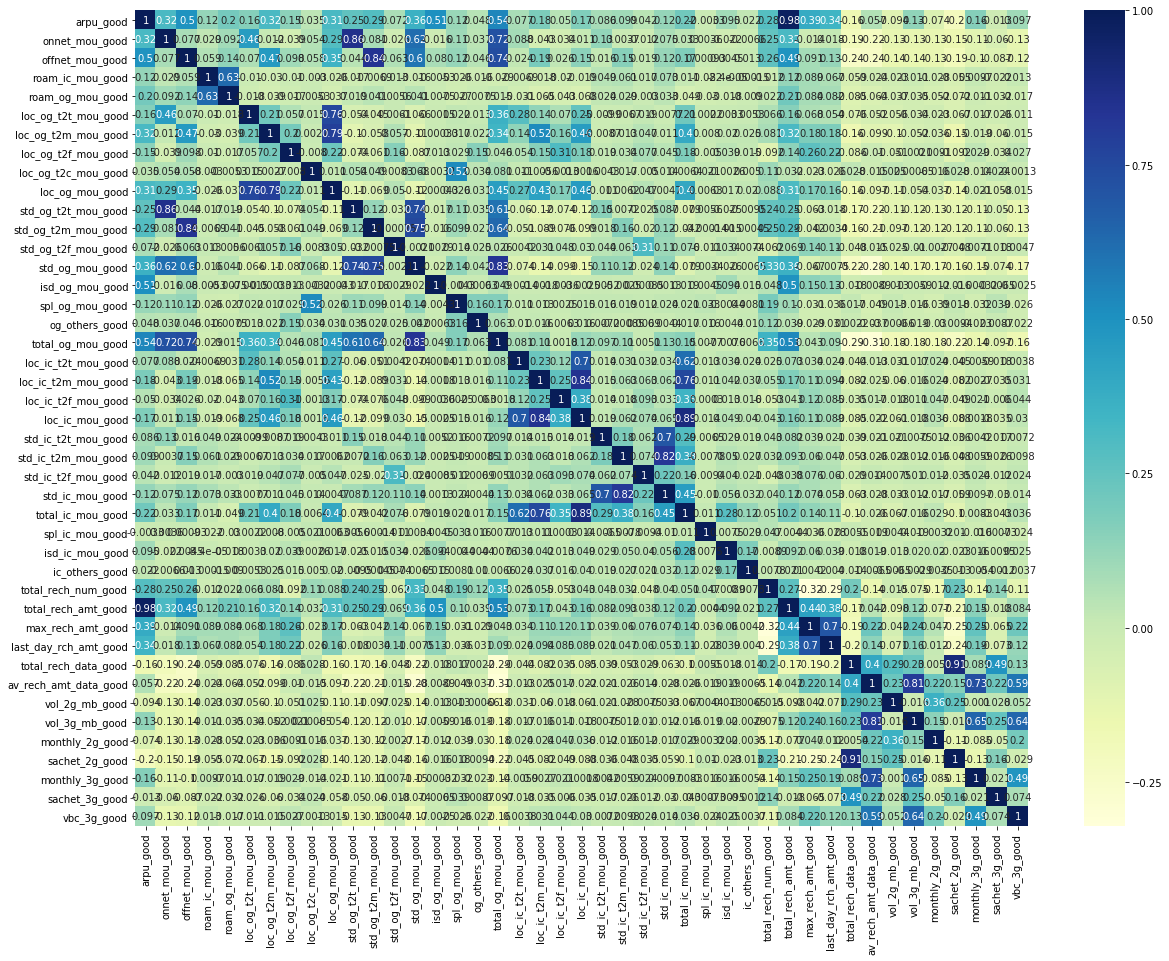

In [42]:
# plotting correlations of good Phase on a heatmap
#-------------------------------------------------------
plt.figure(figsize=(20,15))
sns.heatmap(df_good.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [43]:
## Identify highly corelated columns 
# Create corelation matrix

corr_matrix_good = df_good.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix_good.where(np.triu(np.ones(corr_matrix_good.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop_good = [column for column in upper.columns if any(upper[column] > 0.80)]

print("Columns to Drop from Good phase", to_drop_good)

for c in to_drop_good:
    telecom_hv_cust.drop([c],axis=1,inplace=True)

print('\n')
print("New Shape", telecom_hv_cust.shape)

Columns to Drop from Good phase ['std_og_t2t_mou_good', 'std_og_t2m_mou_good', 'total_og_mou_good', 'loc_ic_mou_good', 'std_ic_mou_good', 'total_ic_mou_good', 'total_rech_amt_good', 'vol_3g_mb_good', 'sachet_2g_good']


New Shape (30001, 81)


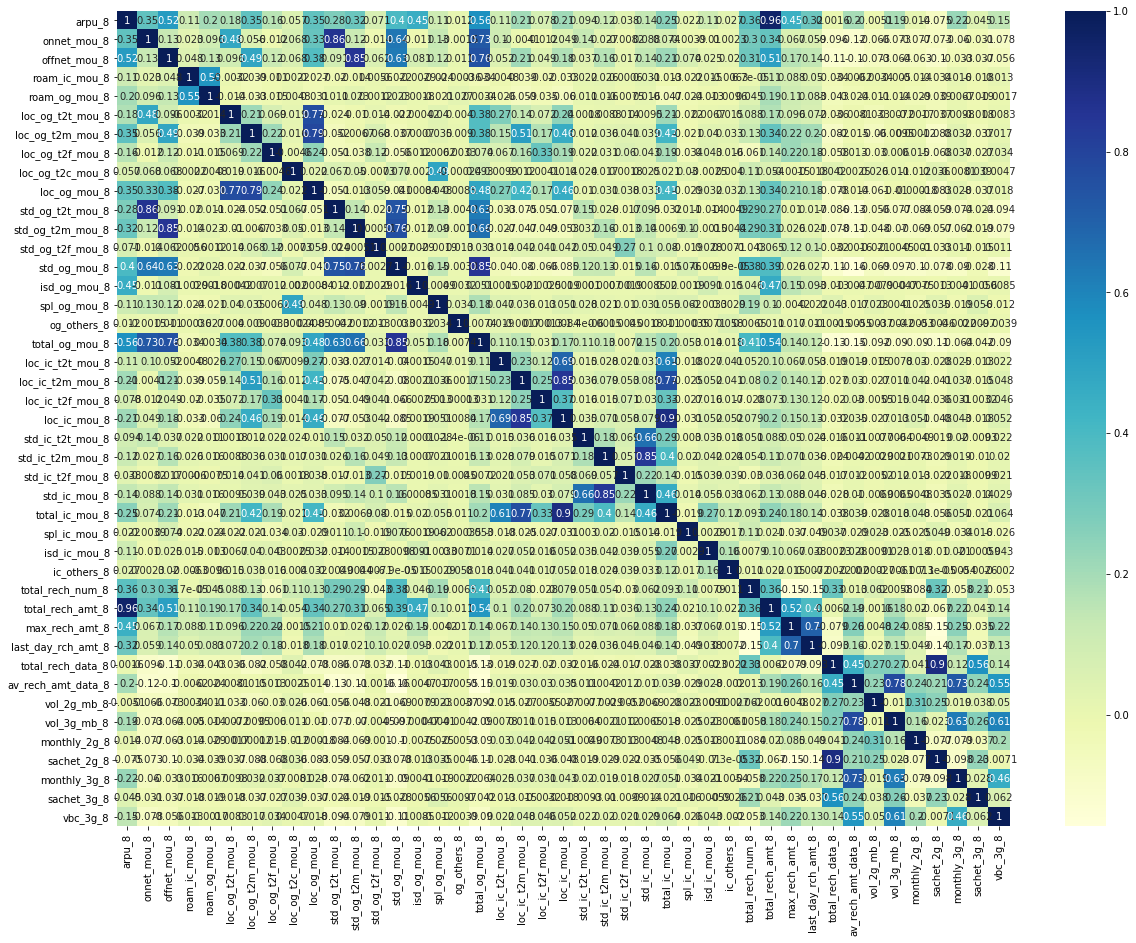

In [44]:
# plotting correlations on a heatmap for Action Phase
#-------------------------------------------------------
plt.figure(figsize=(20,15))
sns.heatmap(df_action.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [45]:
## Dropping highly corelated columns within Action phase 
# Create corelation matrix

corr_matrix_action = df_action.corr().abs()

# Select upper triangle of correlation matrix
upper_a = corr_matrix_action.where(np.triu(np.ones(corr_matrix_action.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop_action = [column for column in upper_a.columns if any(upper_a[column] > 0.80)]

print("Columns to Drop from Action Phase", to_drop_action)

for c in to_drop_action:
    telecom_hv_cust.drop([c],axis=1,inplace=True)
    
print('\n')
print("New Shape", telecom_hv_cust.shape)

Columns to Drop from Action Phase ['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'sachet_2g_8']


New Shape (30001, 73)


In [46]:
## Variance of Total Recharge
#-------------------------------------------------------
telecom_hv_cust.total_recharge.describe()

count     30001.000000
mean       2305.241257
std        2717.427964
min         956.000000
25%        1206.000000
50%        1600.000000
75%        2416.000000
max      122472.000000
Name: total_recharge, dtype: float64

In [47]:
## The "total_recharge" column has a broad variance 
## log value of the total recharge
#-------------------------------------------------------
telecom_hv_cust['total_recharge_log'] = np.log(telecom_hv_cust.total_recharge)

In [48]:
## Dropping the original total recharge column
#-------------------------------------------------------
telecom_hv_cust = telecom_hv_cust.drop(['total_recharge'], axis=1)

In [49]:
## Checking the dataset
#-------------------------------------------------------
telecom_hv_cust.shape

(30001, 73)

## EDA

In [50]:
# arpu_8 and arpu_good
# total_rech_amt_8
# total_rech_data_8 and av_rech_amt_data_8 -> into one
# vol_2g_mb_8 and vol_3g_mb_8
# monthly_2g_8 and monthly_3g_8
# onnet_mou_good
# isd_og_mou_good

In [51]:
# Dropping unique identifier mobile number as it is not in use further

telecom_hv_cust_eda=telecom_hv_cust.drop(['mobile_number'],axis=1)

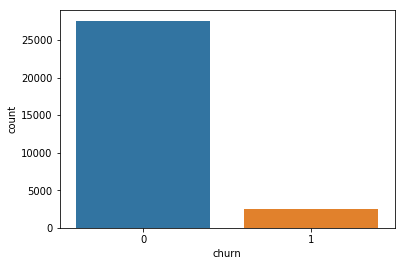

In [52]:
# Churners v/s non- churners

sns.countplot(x=telecom_hv_cust_eda['churn'])
plt.show()
# We have very low amount of churners as compared to non churners in our dataset.

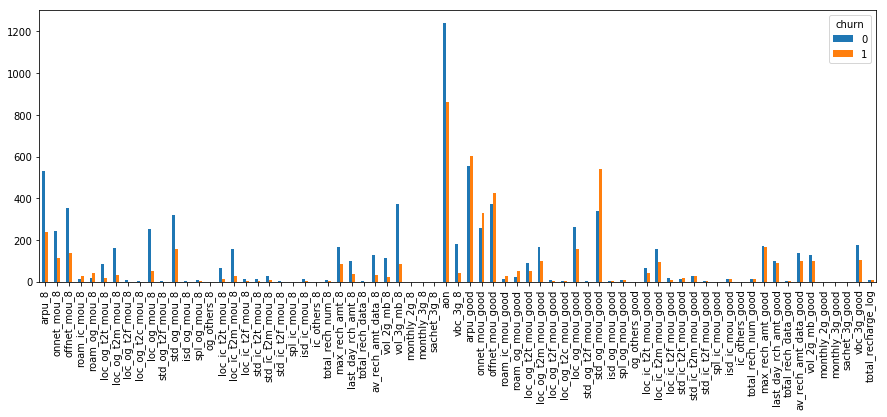

In [53]:
telecom_hv_cust_eda.groupby('churn').mean().transpose().plot(figsize=(15,5),kind='bar')
plt.show()

#### It is evident from the above graph that for churned customers, there is huge difference b/w:
    arpu_8
    onnet_mou_8
    offnet_mou_8
    loc_og_mou_8
    std_og_mou_8
    vol_3g_mb_8
    vbc_3g_8
So may be these are the important columns which indicate that customer might churn subsequently

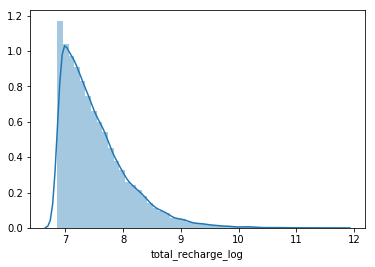

In [54]:
# Recharge distribution
sns.distplot(telecom_hv_cust_eda['total_recharge_log'])
plt.show()

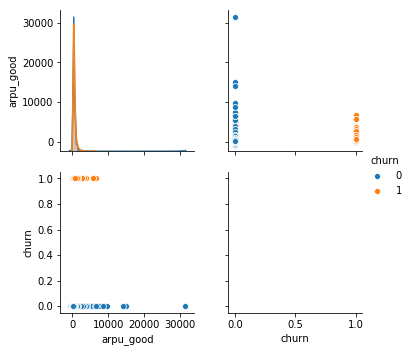

In [55]:
sns.pairplot(data=telecom_hv_cust_eda[['arpu_good','churn']],hue='churn')
plt.show()

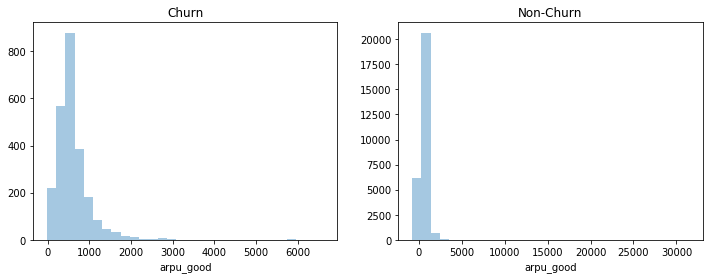

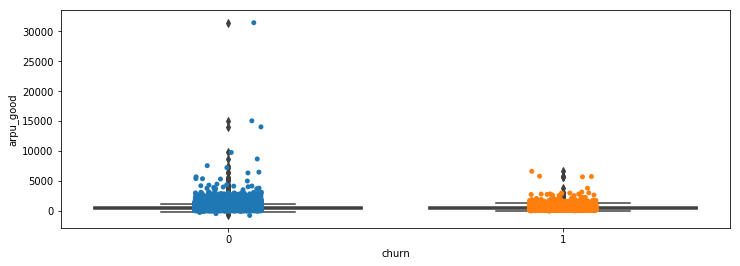

In [56]:
## Average revenue per user
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==1].arpu_good, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==0].arpu_good, bins = 30, ax = axes[1], kde=False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='arpu_good', data=telecom_hv_cust_eda)
sns.stripplot(x='churn', y='arpu_good', data=telecom_hv_cust_eda, jitter=True, edgecolor="gray")
plt.show()

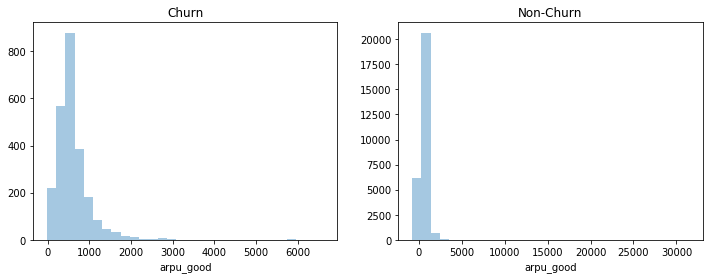

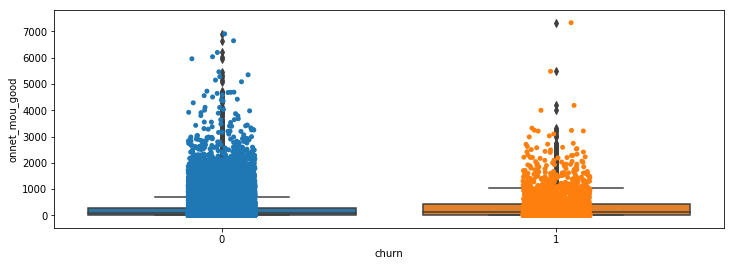

In [57]:
## within the same network usage
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==1].arpu_good, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==0].arpu_good, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='onnet_mou_good', data=telecom_hv_cust_eda)
sns.stripplot(x='churn', y='onnet_mou_good', data=telecom_hv_cust_eda, jitter=True, edgecolor="gray")
plt.show()

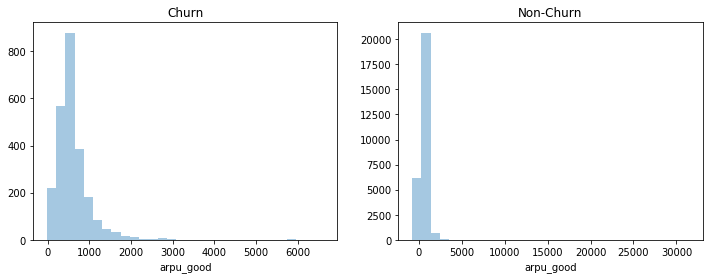

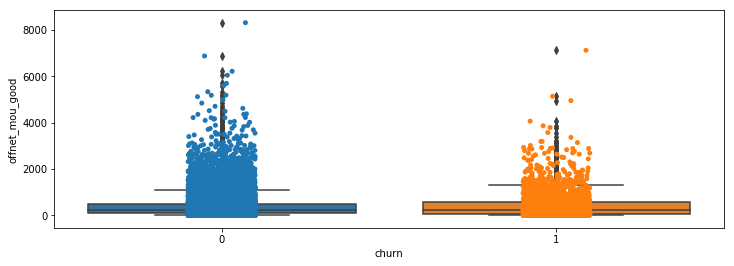

In [58]:
## outside the network usage
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==1].arpu_good, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==0].arpu_good, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn', y='offnet_mou_good', data=telecom_hv_cust_eda)
sns.stripplot(x='churn', y='offnet_mou_good', data=telecom_hv_cust_eda, jitter=True, edgecolor="gray")
plt.show()

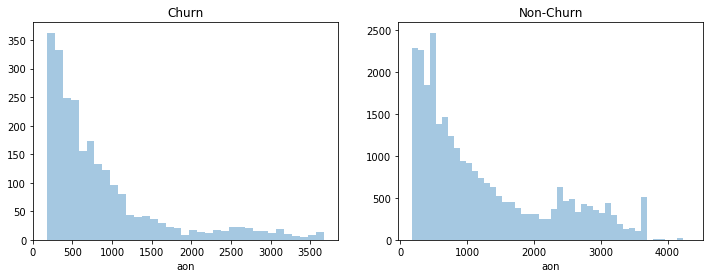

In [59]:
## Age on Network
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==1].aon, ax = axes[0], kde=False)
ax.set_title('Churn')
ax = sns.distplot(telecom_hv_cust_eda[telecom_hv_cust_eda['churn']==0].aon, ax = axes[1], kde= False)
ax.set_title('Non-Churn')
plt.show()

We can see from above that customers who are relatively new to the network have high churn rate.

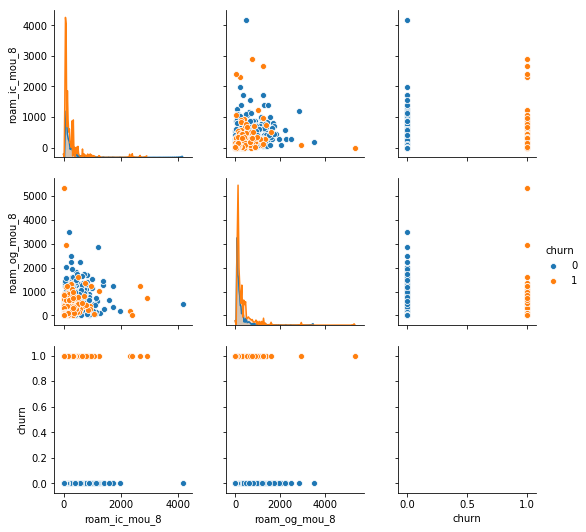

In [60]:
# Plots for roaming for incoming and outgoing

sns.pairplot(data=telecom_hv_cust_eda[['roam_ic_mou_8', 'roam_og_mou_8','churn']],hue='churn')
plt.show()

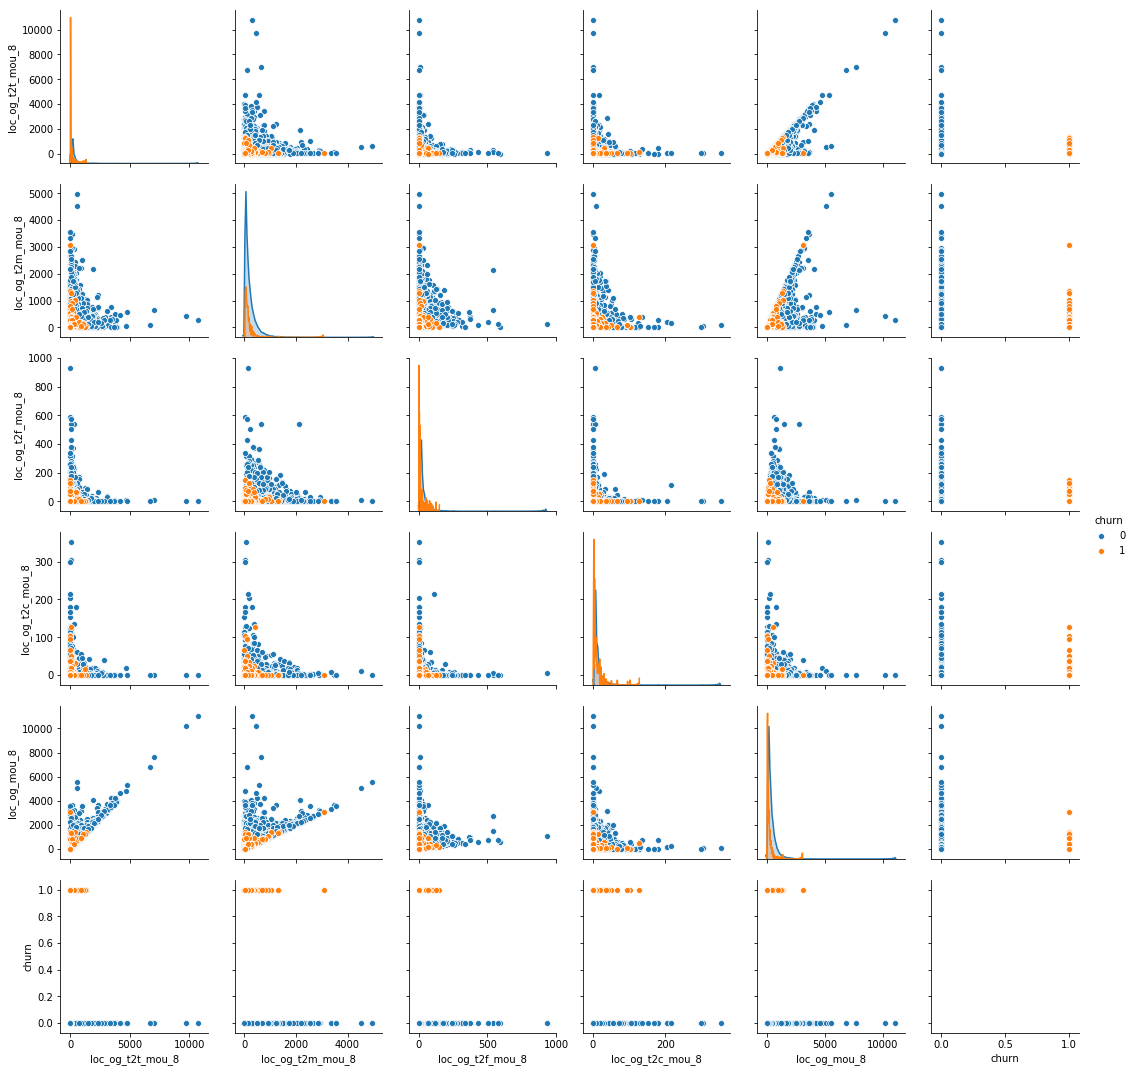

In [61]:
# Plots for local outgoing calls

sns.pairplot(data=telecom_hv_cust_eda[['loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'churn']],hue='churn')
plt.show()

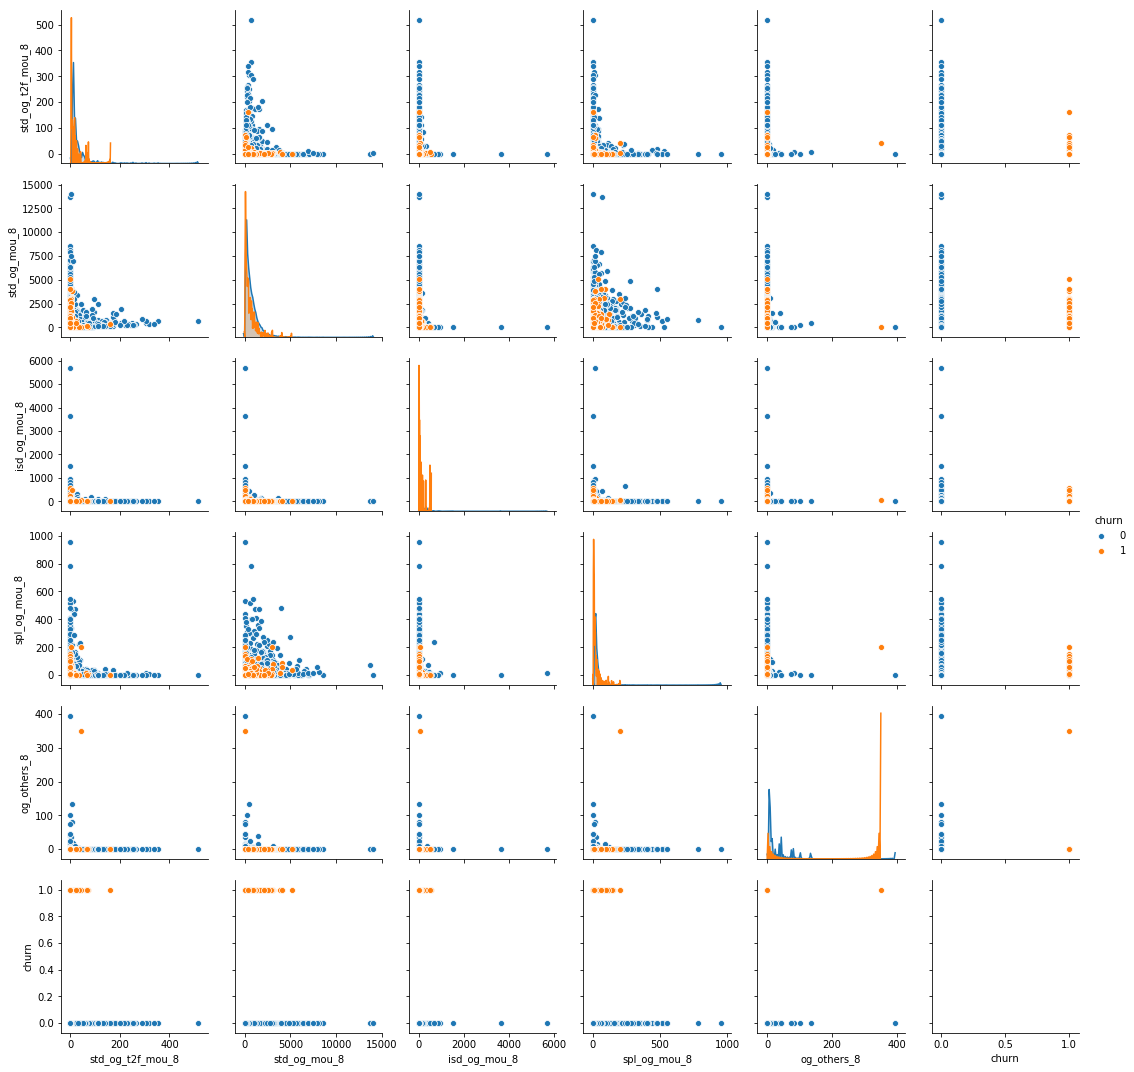

In [62]:
# Plots for other outgoing calls

sns.pairplot(data=telecom_hv_cust_eda[['std_og_t2f_mou_8', 'std_og_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'churn']],hue='churn')
plt.show()

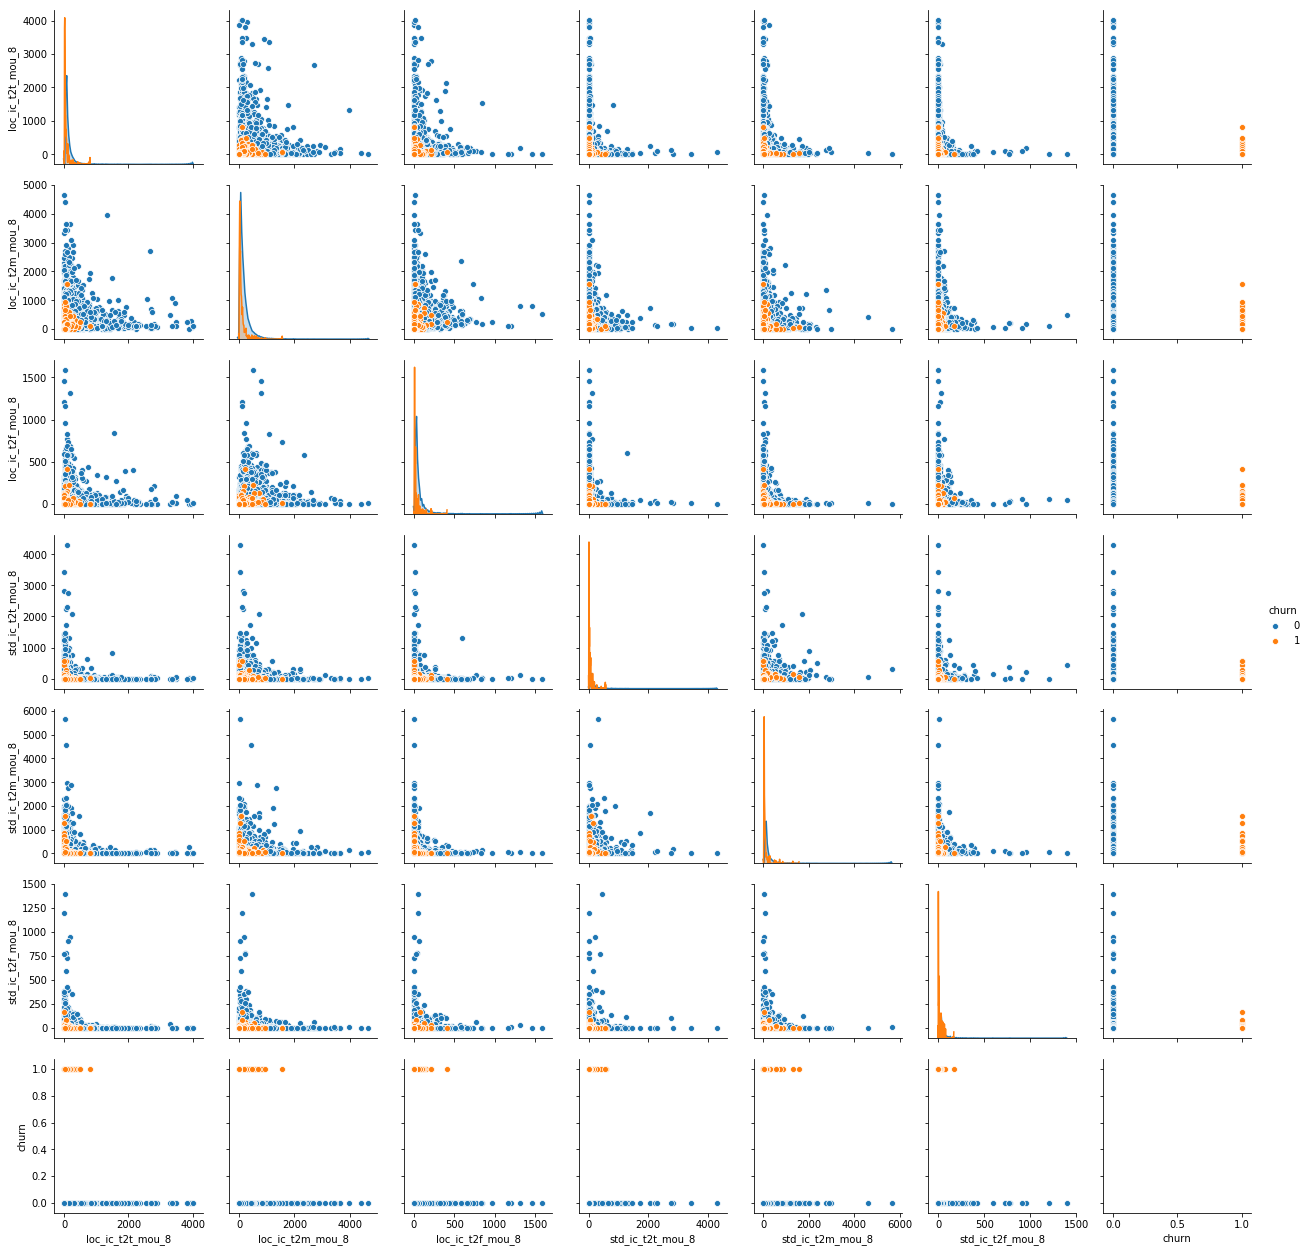

In [63]:
# Plots for local and std incoming calls

sns.pairplot(data=telecom_hv_cust_eda[['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'churn']],hue='churn')
plt.show()

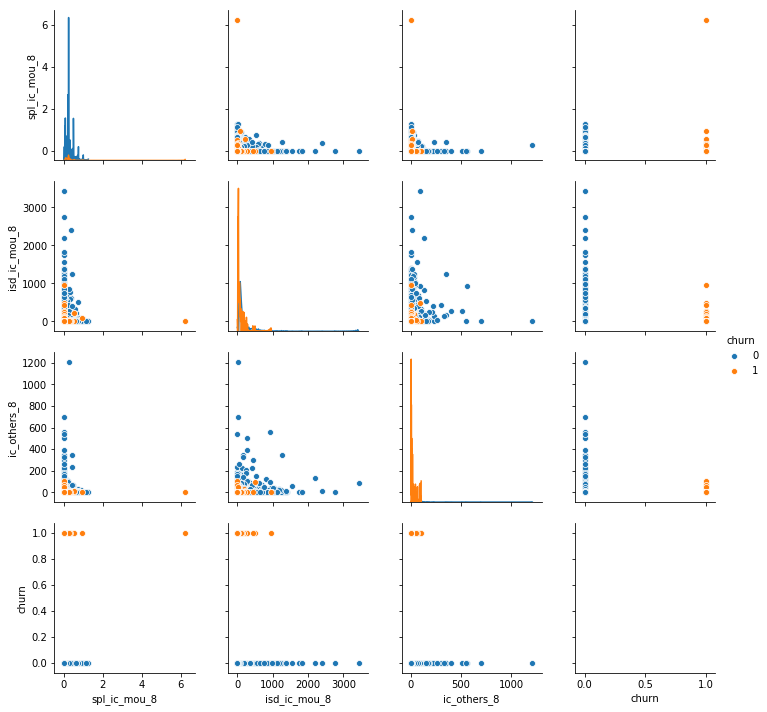

In [64]:
# Plots for other incoming calls

sns.pairplot(data=telecom_hv_cust_eda[['spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'churn']],hue='churn')
plt.show()

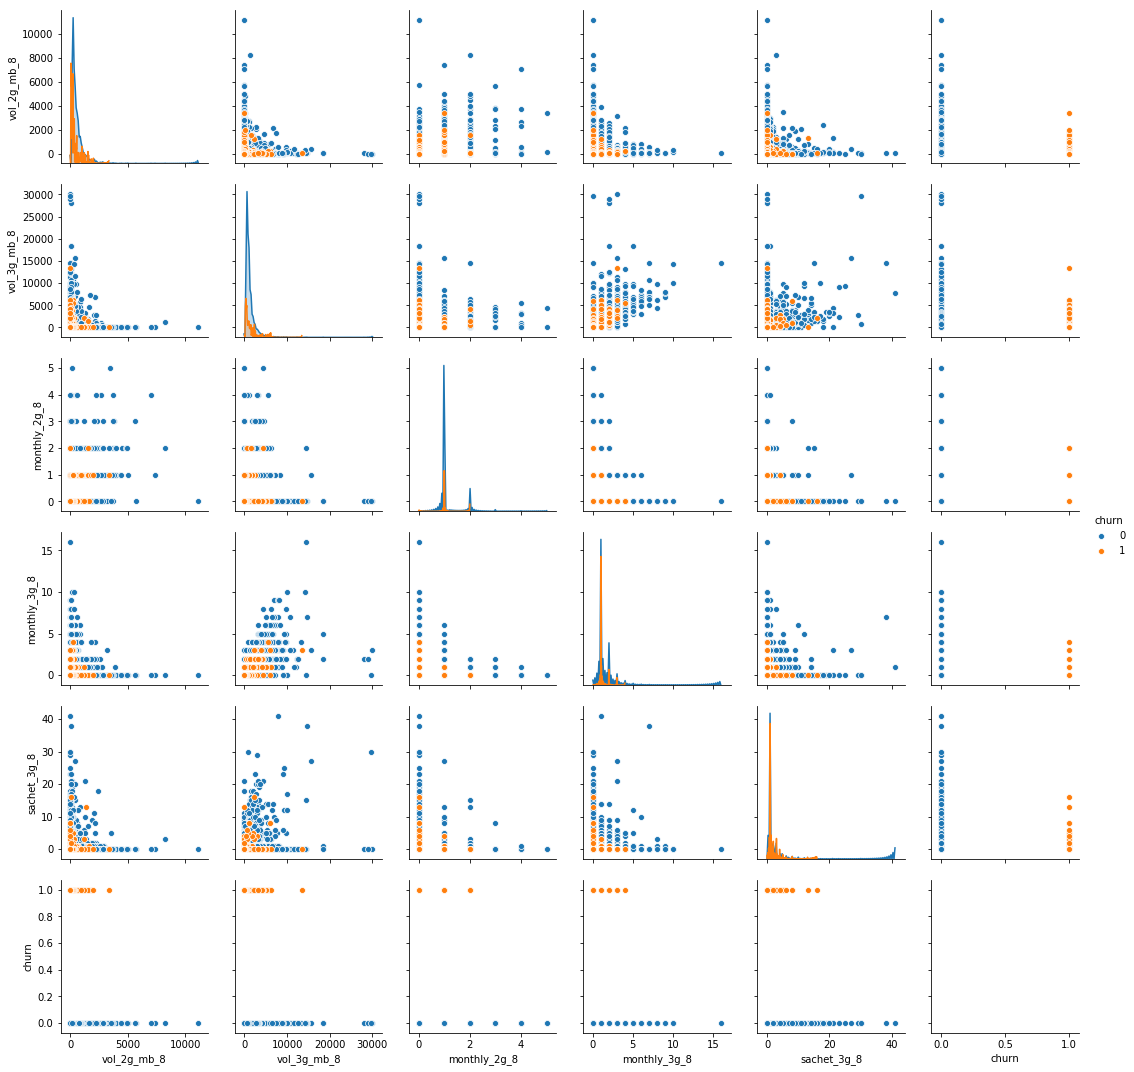

In [65]:
# Plots for other data consumption

sns.pairplot(data=telecom_hv_cust_eda[['vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'churn']],hue='churn')
plt.show()

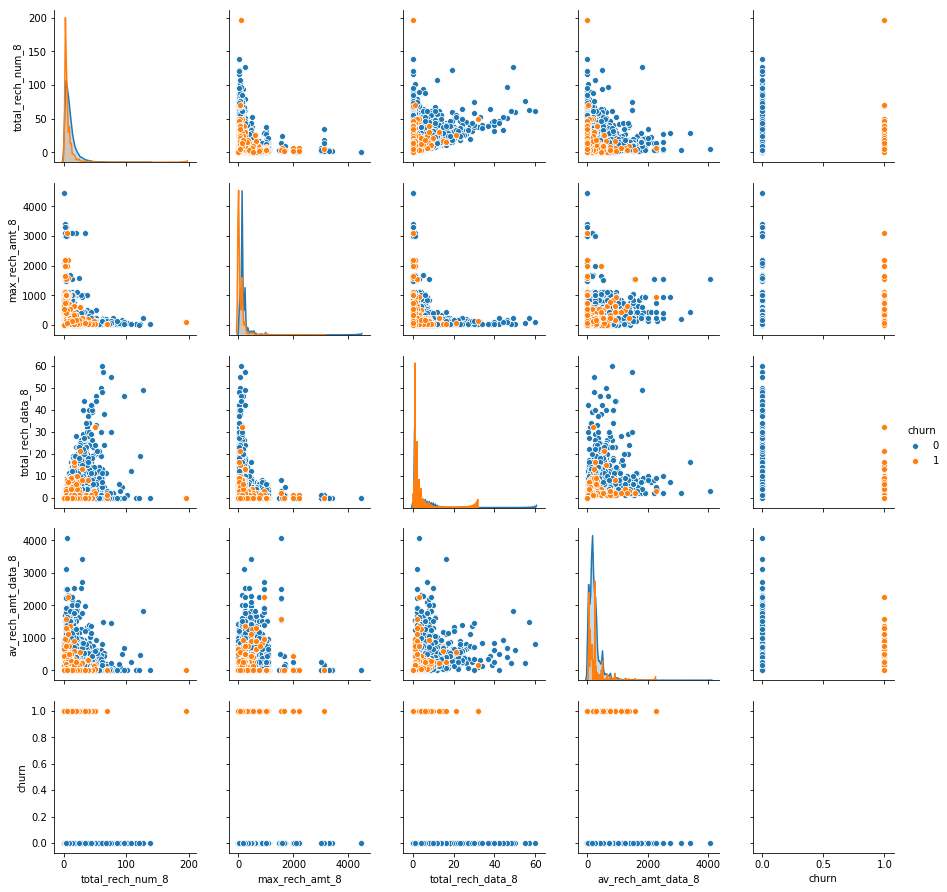

In [66]:
# Plots for recharges

sns.pairplot(data=telecom_hv_cust_eda[['total_rech_num_8', 'max_rech_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'churn']],hue='churn')
plt.show()

1. From EDA we can conclude that there arent many outliers in the datasets.
2. There are some clear patterns in the data which we would explore while creating the models in the later sections.
3. Churners are always at the lower left part of the graphs which indicates that value of usage ( call/data/incoming/outgoing) decrease considerably for churnes especailly in action phase

## Model Building
### Step 1 : X and Y

In [67]:
## Dividing the data into x and y
Y=telecom_hv_cust['churn']
X=telecom_hv_cust.drop(['mobile_number','churn'],axis=1)

In [68]:
X.shape

(30001, 71)

### Step 2 : Feature X Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 3 : Split into Test and Train

In [70]:
# train test split with train_size=70% and test size=30%
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.70, test_size=0.30, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 71)
(9001, 71)
(21000,)
(9001,)


### Step 4 : PCA

In [71]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [72]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [73]:
print(pca.explained_variance_ratio_.round(3)*100)

[9.8 8.5 6.1 5.3 4.1 3.9 3.4 3.2 3.1 3.  2.8 2.8 2.5 2.3 2.1 2.1 2.  1.8
 1.7 1.7 1.6 1.5 1.5 1.4 1.2 1.2 1.1 1.1 1.  1.  0.9 0.9 0.9 0.8 0.8 0.8
 0.7 0.6 0.5 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.2 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


In [74]:
pca.components_

array([[ 2.72021041e-01,  1.39245501e-01,  2.09185236e-01, ...,
        -4.43188429e-02,  2.78707337e-02,  8.61093497e-02],
       [ 4.36589465e-02, -1.32676727e-01, -1.00774447e-01, ...,
         1.03372481e-01,  2.68748851e-01,  2.13551562e-01],
       [ 2.36355482e-01,  1.53625763e-01,  1.31235121e-01, ...,
         1.14869590e-01,  3.39153013e-02,  2.13568987e-01],
       ...,
       [ 2.19925034e-03,  3.22984362e-01,  3.39056567e-01, ...,
         9.63930059e-05,  1.84381404e-04, -9.18713295e-05],
       [ 9.04082985e-07,  1.04836306e-05,  1.09945172e-05, ...,
         3.19680510e-07,  2.98652121e-07,  1.88438163e-07],
       [-4.29410231e-07, -7.19154725e-06, -7.56228013e-06, ...,
        -1.74580058e-08,  1.57685435e-07,  2.43315580e-07]])

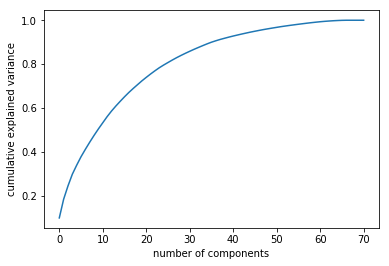

In [75]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
import numpy as np
fig = plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [76]:
#Using incremental PCA for efficiency - with 40 components as it gives around 0.90 variance
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

In [77]:
pca_x_train = pca_final.fit_transform(x_train)
pca_x_train.shape

(21000, 40)

In [78]:
pca_data = pd.DataFrame(data=pca_x_train)
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,12.550156,1.682109,-0.552325,8.682767,-5.659899,-5.364053,6.192351,2.192190,-2.827650,-1.471404,-0.034302,0.105853,-0.542355,0.724168,-0.464378,-1.325319,-5.454674,-0.785006,-0.953950,0.691215,0.312660,-0.243239,-1.393378,1.033253,0.700872,-0.355820,-0.259098,-0.327779,-0.090843,-1.506641,0.908021,-0.192338,1.518810,-0.507965,-1.504868,-0.222321,-0.120868,-0.197668,-0.467480,-0.314366
1,-1.084715,0.035574,-2.041478,0.266825,1.242043,0.007103,-0.314843,0.144799,0.801599,1.560547,-0.380278,-0.736334,0.173861,1.095819,-0.216124,-0.408965,0.824313,-0.793290,0.432994,1.433398,0.875173,1.474319,1.617598,-0.286863,-0.721530,-0.140158,0.428024,0.766403,-1.148256,0.507219,0.125314,0.091354,0.606839,-0.715129,-0.206534,0.116967,0.160652,-0.433993,-0.171235,0.052102
2,-0.386934,0.329514,0.050681,-3.233390,-1.745752,0.156112,-1.069938,4.678027,-0.207852,-0.492999,-0.410420,-0.573562,0.921667,0.736826,0.016280,-0.330373,-0.819011,-0.392126,1.172084,-0.243346,0.742383,-0.097730,-0.038600,-0.377362,0.852679,-0.405524,0.403461,-1.430650,0.838570,-0.944077,0.034587,0.028391,0.573233,-0.546567,2.295329,-0.603743,-0.675942,0.274257,0.190416,0.079541
3,3.722873,-0.767416,-0.383493,1.970115,0.284915,-0.618759,-0.680104,-0.293711,-0.171672,-0.093840,0.260103,-0.929106,-0.436254,-0.120367,-0.156564,-0.424191,-0.427205,-0.169420,-0.073065,-0.108364,-1.840664,-0.490747,-0.242531,0.526164,-0.597611,0.079972,-0.124429,-0.280315,-0.139176,-0.207860,-0.734597,0.191131,-0.055258,0.135360,0.031990,-0.303556,0.106622,1.060988,-0.378870,-0.761053
4,-0.392905,-1.006691,-1.190097,-0.999875,0.068903,-0.439809,-1.257030,0.845152,-0.003264,-0.778797,0.609730,-0.485907,0.234759,-0.656341,-0.111248,-0.121036,0.248544,-0.493060,-0.071765,0.008674,-0.257525,-0.083017,-0.100139,-0.192283,-0.132254,-0.539095,0.198172,-0.228934,0.111403,-1.040567,0.591986,-0.351947,0.804499,0.551997,-0.098420,0.076372,0.123038,-0.471660,0.177630,0.225354


In [79]:
pca_data.index = y_train
#telecom_pca_data.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.550156,1.682109,-0.552325,8.682767,-5.659899,-5.364053,6.192351,2.192190,-2.827650,-1.471404,-0.034302,0.105853,-0.542355,0.724168,-0.464378,-1.325319,-5.454674,-0.785006,-0.953950,0.691215,0.312660,-0.243239,-1.393378,1.033253,0.700872,-0.355820,-0.259098,-0.327779,-0.090843,-1.506641,0.908021,-0.192338,1.518810,-0.507965,-1.504868,-0.222321,-0.120868,-0.197668,-0.467480,-0.314366
0,-1.084715,0.035574,-2.041478,0.266825,1.242043,0.007103,-0.314843,0.144799,0.801599,1.560547,-0.380278,-0.736334,0.173861,1.095819,-0.216124,-0.408965,0.824313,-0.793290,0.432994,1.433398,0.875173,1.474319,1.617598,-0.286863,-0.721530,-0.140158,0.428024,0.766403,-1.148256,0.507219,0.125314,0.091354,0.606839,-0.715129,-0.206534,0.116967,0.160652,-0.433993,-0.171235,0.052102
0,-0.386934,0.329514,0.050681,-3.233390,-1.745752,0.156112,-1.069938,4.678027,-0.207852,-0.492999,-0.410420,-0.573562,0.921667,0.736826,0.016280,-0.330373,-0.819011,-0.392126,1.172084,-0.243346,0.742383,-0.097730,-0.038600,-0.377362,0.852679,-0.405524,0.403461,-1.430650,0.838570,-0.944077,0.034587,0.028391,0.573233,-0.546567,2.295329,-0.603743,-0.675942,0.274257,0.190416,0.079541
0,3.722873,-0.767416,-0.383493,1.970115,0.284915,-0.618759,-0.680104,-0.293711,-0.171672,-0.093840,0.260103,-0.929106,-0.436254,-0.120367,-0.156564,-0.424191,-0.427205,-0.169420,-0.073065,-0.108364,-1.840664,-0.490747,-0.242531,0.526164,-0.597611,0.079972,-0.124429,-0.280315,-0.139176,-0.207860,-0.734597,0.191131,-0.055258,0.135360,0.031990,-0.303556,0.106622,1.060988,-0.378870,-0.761053
0,-0.392905,-1.006691,-1.190097,-0.999875,0.068903,-0.439809,-1.257030,0.845152,-0.003264,-0.778797,0.609730,-0.485907,0.234759,-0.656341,-0.111248,-0.121036,0.248544,-0.493060,-0.071765,0.008674,-0.257525,-0.083017,-0.100139,-0.192283,-0.132254,-0.539095,0.198172,-0.228934,0.111403,-1.040567,0.591986,-0.351947,0.804499,0.551997,-0.098420,0.076372,0.123038,-0.471660,0.177630,0.225354


In [80]:
pca_data.reset_index(inplace=True)

In [81]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,0.272021,0.043659,arpu_8
1,0.139246,-0.132677,onnet_mou_8
2,0.209185,-0.100774,offnet_mou_8
3,0.037837,0.001332,roam_ic_mou_8
4,0.051503,-0.015472,roam_og_mou_8


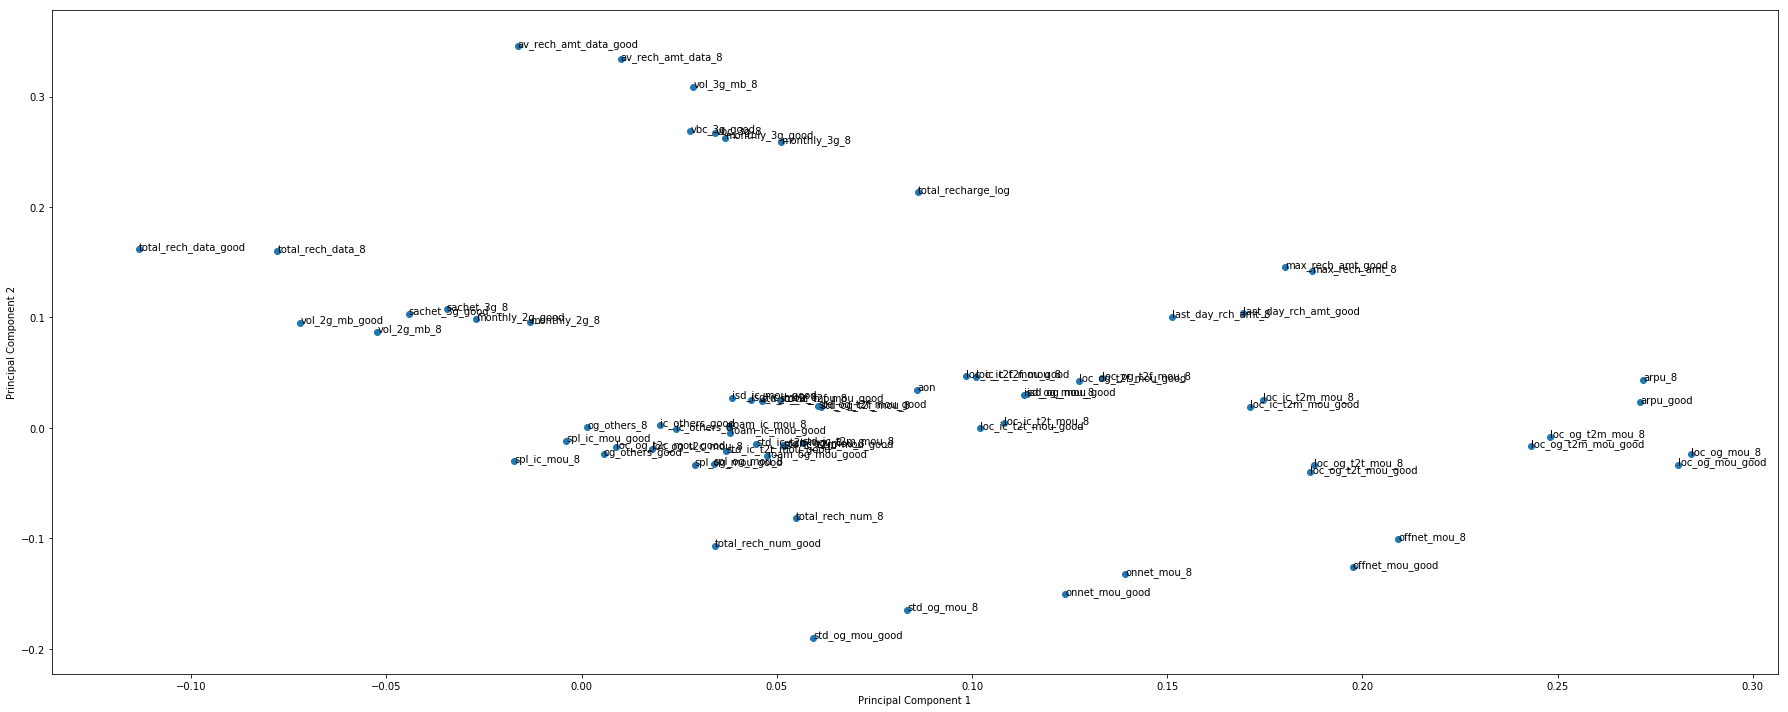

In [82]:
#Lets see the relationship b/ various variables for PC1 and PC2
#----------------------------------------------------------------
fig = plt.figure(figsize = (25,10))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [83]:
corrmat = np.corrcoef(pca_data.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.20895967388885023 , min corr:  -0.13351042090144413


In [85]:
#Applying selected components to the test data
pca_x_test = pca_final.transform(x_test)
pca_x_test.shape

(9001, 40)

## Model-1 Simple Logistic regression on PCA df

In [86]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_lr = lr.fit(pca_x_train,y_train)

In [87]:
#Making prediction on the test data
pred_lr_test = model_lr.predict_proba(pca_x_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_lr_test))

'0.88'

In [88]:
pred_lr_test_1 = model_lr.predict(pca_x_test)

In [89]:
print(classification_report(y_test,pred_lr_test_1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8271
           1       0.59      0.20      0.30       730

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.76      0.60      0.63      9001
weighted avg       0.91      0.92      0.91      9001



In [90]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred_lr_test_1))

[[8169  102]
 [ 581  149]]


#### This model does not do justice with the churners as it is not able to predict the churners correctly
    We must try different models to predict the churnes correctly.

#### Since the data is imbalanced, so lets try balanced logistic regression

## Model 2 : Balanced Logistic Regression

In [91]:
lr_bal = LogisticRegression(class_weight='balanced')
lr_bal.fit(pca_x_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [92]:
lr_bal_pred = lr_bal.predict(pca_x_test)

In [93]:
print(classification_report(y_test,lr_bal_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8271
           1       0.27      0.82      0.40       730

   micro avg       0.80      0.80      0.80      9001
   macro avg       0.62      0.81      0.64      9001
weighted avg       0.92      0.80      0.84      9001



In [94]:
# Printing confusion matrix
print(confusion_matrix(y_test,lr_bal_pred))

[[6630 1641]
 [ 132  598]]


In [95]:
print(accuracy_score(y_test,lr_bal_pred))

0.8030218864570603


In [96]:
# ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

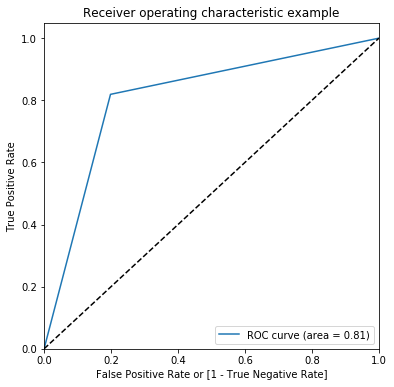

(array([0.        , 0.19840406, 1.        ]),
 array([0.        , 0.81917808, 1.        ]),
 array([2, 1, 0]))

In [97]:
draw_roc(y_test, lr_bal_pred)

### Above Balanced LR model looks OK because:
    It is able to predict most of the churners ( Recall Score is good)
    ROC curve is also good. 0.8
    Small issue that it is predicting non churners as churnes, so lets try other model if they can predict better

## Model 3 :  Random Forest Classification Model on PCA data frame 

In [98]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [99]:
# fit
rfc.fit(pca_x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
# Making predictions
predictions_rf = rfc.predict(pca_x_test)

In [101]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8271
           1       0.53      0.15      0.24       730

   micro avg       0.92      0.92      0.92      9001
   macro avg       0.73      0.57      0.60      9001
weighted avg       0.90      0.92      0.90      9001



In [102]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_rf))

[[8170  101]
 [ 618  112]]


In [103]:
print(accuracy_score(y_test,predictions_rf))

0.920119986668148


#### This default Random Forest model aslo does not do good because it is not able to predict the churners correctly.
    We must try balanced apprach here as well.

## Model 4 :  Random Forest with hyperparametrs

#### Hyper Parameter Tuning
##### 1. max_depth

In [104]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
rf.fit(pca_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [105]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.393437,0.001579,0.012026,0.001044,2,{'max_depth': 2},0.815270,0.842862,0.840307,0.812259,0.842694,0.830677,0.013872,4,0.820619,0.837712,0.847669,0.820359,0.848240,0.834920,0.012364
1,1.115188,0.008817,0.013422,0.003456,7,{'max_depth': 7},0.867178,0.875446,0.853312,0.856537,0.869162,0.864327,0.008212,1,0.924083,0.927880,0.927481,0.923158,0.925334,0.925587,0.001848
2,1.587851,0.025602,0.018637,0.001393,12,{'max_depth': 12},0.860355,0.857668,0.846566,0.850984,0.856292,0.854373,0.004955,2,0.993953,0.993069,0.991734,0.991559,0.990372,0.992137,0.001247
3,1.760716,0.040282,0.019773,0.001159,17,{'max_depth': 17},0.846826,0.829155,0.843357,0.835901,0.829926,0.837034,0.007068,3,0.999480,0.999449,0.999582,0.999490,0.999703,0.999541,0.000093


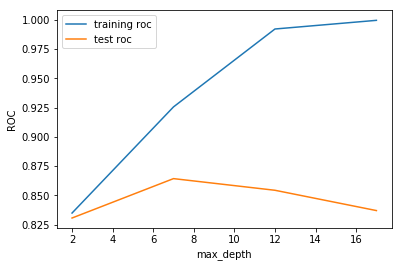

In [106]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training roc")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test roc")
plt.xlabel("max_depth")
plt.ylabel("ROC")
plt.legend()
plt.show()

##### 7 looks to be good max_depth

##### 2.  Hyperparameter : n_estimators = number of trees in the foreset

In [107]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(5, 50, 5)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=7)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
rf.fit(pca_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(5, 50, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [108]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.558747,0.015881,0.009380,0.001834,5,{'n_estimators': 5},0.852577,0.847267,0.839573,0.847689,0.844201,0.846262,0.004288,9,0.913459,0.912264,0.910093,0.910990,0.911827,0.911726,0.001141
1,1.107466,0.005490,0.015060,0.001689,10,{'n_estimators': 10},0.861590,0.878925,0.845414,0.865185,0.863211,0.862865,0.010673,8,0.931189,0.925669,0.932847,0.930372,0.930598,0.930135,0.002395
2,1.669376,0.012236,0.019126,0.001571,15,{'n_estimators': 15},0.872746,0.884298,0.862862,0.865287,0.866253,0.870289,0.007730,7,0.933333,0.933846,0.935337,0.929691,0.934022,0.933246,0.001896
3,2.206473,0.023160,0.024539,0.001450,20,{'n_estimators': 20},0.879065,0.877113,0.869345,0.872724,0.871478,0.873945,0.003605,3,0.939599,0.939790,0.939105,0.935965,0.939549,0.938802,0.001436
4,2.770509,0.011243,0.027876,0.001560,25,{'n_estimators': 25},0.874109,0.882003,0.863712,0.872392,0.873150,0.873073,0.005812,5,0.938597,0.940332,0.938333,0.943337,0.944720,0.941064,0.002554


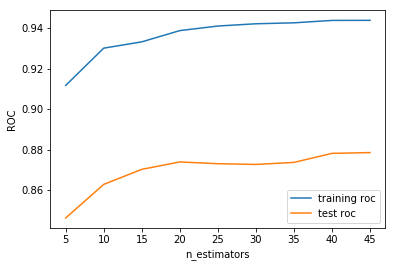

In [109]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training roc")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test roc")
plt.xlabel("n_estimators")
plt.ylabel("ROC")
plt.legend()
plt.show()

#### 20 looks to be the correct number

#### 3.  Hyperparameter : max_features

In [110]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5,10,15,20,25,30,35]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
rf.fit(pca_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [5, 10, 15, 20, 25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [111]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.034865,0.016814,0.014954,0.001529,5,{'max_features': 5},0.867447,0.867053,0.844637,0.856433,0.854491,0.858013,0.008539,7,0.944915,0.947869,0.952679,0.942991,0.946469,0.946985,0.003278
1,2.026108,0.013849,0.014870,0.000569,10,{'max_features': 10},0.869766,0.875935,0.857429,0.847530,0.875362,0.865204,0.011063,5,0.951499,0.944688,0.948207,0.946092,0.953251,0.948748,0.003215
2,2.922002,0.180424,0.014790,0.001423,15,{'max_features': 15},0.878546,0.870921,0.852676,0.858623,0.859819,0.864118,0.009317,6,0.949180,0.948567,0.951576,0.946545,0.953249,0.949823,0.002347
3,3.625763,0.342711,0.012604,0.002298,20,{'max_features': 20},0.879426,0.878857,0.859975,0.855451,0.863367,0.867416,0.009901,4,0.953254,0.950237,0.954094,0.945415,0.949832,0.950566,0.003061
4,4.041647,0.071974,0.013083,0.002730,25,{'max_features': 25},0.874095,0.876460,0.861046,0.866911,0.860286,0.867760,0.006595,3,0.950965,0.945220,0.947340,0.946632,0.948672,0.947766,0.001950


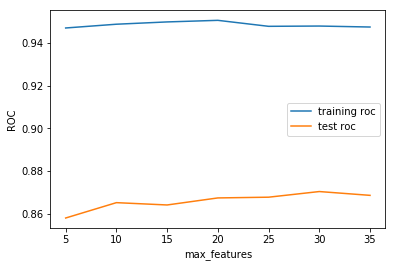

In [112]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training roc")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test roc")
plt.xlabel("max_features")
plt.ylabel("ROC")
plt.legend()
plt.show()

#### May be 20 ?

### Tuning min_samples_leaf

In [113]:
# GridSearchCV to find optimal min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(10,500,50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
rf.fit(pca_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(10, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.565681,0.044160,0.018704,0.000702,10,{'min_samples_leaf': 10},0.878712,0.876649,0.855585,0.856681,0.864666,0.866459,0.009707,3,0.975581,0.976738,0.976153,0.976318,0.975855,0.976129,0.000395
1,1.126670,0.200391,0.016435,0.001710,60,{'min_samples_leaf': 60},0.879321,0.877620,0.858178,0.864716,0.874330,0.870833,0.008098,1,0.926705,0.918181,0.926785,0.929076,0.924102,0.924970,0.003742
2,1.078700,0.014114,0.015672,0.002238,110,{'min_samples_leaf': 110},0.875449,0.878855,0.855466,0.861887,0.862757,0.866883,0.008821,2,0.906060,0.905162,0.908907,0.904270,0.911324,0.907145,0.002606
3,0.998982,0.019265,0.038234,0.044929,160,{'min_samples_leaf': 160},0.865409,0.869578,0.855408,0.859448,0.865545,0.863078,0.005015,5,0.899557,0.897348,0.901990,0.896389,0.900633,0.899184,0.002064
4,0.932072,0.012136,0.013933,0.001478,210,{'min_samples_leaf': 210},0.853851,0.884696,0.856493,0.868881,0.855417,0.863867,0.011705,4,0.889361,0.893761,0.892311,0.891943,0.893039,0.892083,0.001497


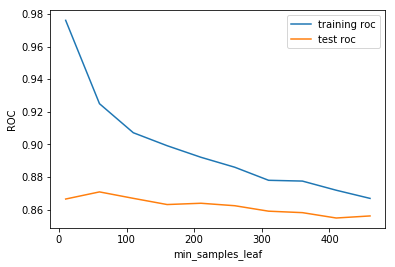

In [115]:
# plotting roc with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training roc")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test roc")
plt.xlabel("min_samples_leaf")
plt.ylabel("ROC")
plt.legend()
plt.show()

#### 75 looks ok

### Tuning min_samples_split

In [116]:
# GridSearchCV to find optimal min_samples_split
# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="roc_auc")
rf.fit(pca_x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [117]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.698901,0.083335,0.018675,0.001999,100,{'min_samples_split': 100},0.875795,0.878234,0.852698,0.859595,0.869515,0.867168,0.009686,5,0.959007,0.957905,0.956888,0.960107,0.954850,0.957752,0.001806
1,1.617187,0.043924,0.017868,0.001198,150,{'min_samples_split': 150},0.874831,0.872312,0.866717,0.860376,0.863034,0.867455,0.005445,3,0.948757,0.946285,0.947563,0.946517,0.948301,0.947485,0.000966
2,1.598502,0.015962,0.017995,0.001031,200,{'min_samples_split': 200},0.883861,0.869493,0.855206,0.864821,0.864913,0.867660,0.009344,2,0.935684,0.940295,0.936351,0.935980,0.938897,0.937441,0.001826
3,1.528731,0.017065,0.017567,0.001827,250,{'min_samples_split': 250},0.882752,0.872252,0.869144,0.869776,0.867421,0.872270,0.005466,1,0.932975,0.929809,0.931299,0.932495,0.933264,0.931968,0.001271
4,1.513094,0.031796,0.016103,0.001714,300,{'min_samples_split': 300},0.878974,0.872028,0.845260,0.864010,0.859142,0.863884,0.011519,8,0.928699,0.925361,0.929600,0.926361,0.925877,0.927180,0.001664


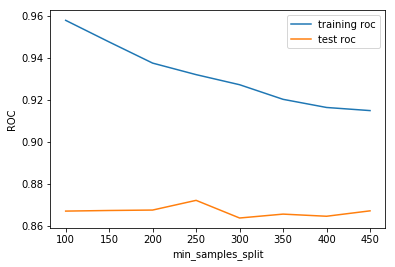

In [118]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training roc")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test roc")
plt.xlabel("min_samples_split")
plt.ylabel("ROC")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters

In [119]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,8,10],
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(100,400,100),
    'n_estimators': [15,20,25], 
    'max_features': [15,20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [120]:
# Fit the grid search to the data
grid_search.fit(pca_x_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  4.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(100, 400, 100), 'n_estimators': [15, 20, 25], 'max_features': [15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [121]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9245714285714286 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 20}


#### Fitting the final model with the best parameters obtained from grid search.

In [122]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight={0:0.1, 1: 0.9},
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=15)

rfc_2 = RandomForestClassifier(bootstrap=True, class_weight={0:0.1, 1: 0.9},
                             max_depth=10,
                             min_samples_leaf=25, 
                             min_samples_split=200,
                             max_features=25,
                             n_estimators=20)

rfc_3 = RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample",
                             max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=15)

In [123]:
# fit
rfc.fit(pca_x_train,y_train)
rfc_2.fit(pca_x_train,y_train)
rfc_3.fit(pca_x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=8, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [124]:
# predict
predictions_rf = rfc.predict(pca_x_test)
predictions_rf_2 = rfc_2.predict(pca_x_test)
predictions_rf_3 = rfc_3.predict(pca_x_test)

In [125]:
print(classification_report(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf_2))
print(classification_report(y_test,predictions_rf_3))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8271
           1       0.37      0.69      0.48       730

   micro avg       0.88      0.88      0.88      9001
   macro avg       0.67      0.79      0.71      9001
weighted avg       0.92      0.88      0.90      9001

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8271
           1       0.37      0.69      0.48       730

   micro avg       0.88      0.88      0.88      9001
   macro avg       0.67      0.79      0.70      9001
weighted avg       0.92      0.88      0.89      9001

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8271
           1       0.33      0.72      0.45       730

   micro avg       0.86      0.86      0.86      9001
   macro avg       0.65      0.80      0.69      9001
weighted avg       0.92      0.86      0.88      9001



In [126]:
print(confusion_matrix(y_test,predictions_rf))
print(confusion_matrix(y_test,predictions_rf_2))
print(confusion_matrix(y_test,predictions_rf_3))

[[7420  851]
 [ 226  504]]
[[7398  873]
 [ 228  502]]
[[7189 1082]
 [ 201  529]]


In [127]:
print(accuracy_score(y_test,predictions_rf))
print(accuracy_score(y_test,predictions_rf_2))
print(accuracy_score(y_test,predictions_rf_3))

0.8803466281524275
0.8776802577491389
0.8574602821908677


#### Based on above parameters, rfc_2 model is better because it is predicting churn and non churners correctly

ROC for the test dataset 87.7%


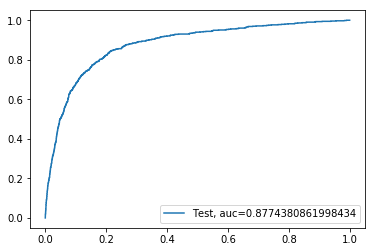

In [128]:
rfc_train=rfc_2.fit(pca_x_train,y_train)
preds_probs_RFC=rfc_train.predict_proba(pca_x_test)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Feature Selection from Random Forest

In [129]:
## Features which are contributing towards "churn" with weightage
importances = rfc_train.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'value','colName'})
sorted_feature_importance

,colName,value
0,0.310305,std_ic_t2f_mou_8
1,0.127711,arpu_8
2,0.088155,onnet_mou_8
3,0.062822,roam_ic_mou_8
4,0.058694,loc_ic_t2f_mou_8
5,0.050004,loc_og_mou_8
6,0.026654,std_ic_t2t_mou_8
7,0.026298,loc_ic_t2m_mou_8
8,0.026237,std_ic_t2m_mou_8
9,0.025450,loc_og_t2t_mou_8


## Model 5 : Decision Tree Classification on original data frame ( not on PCA)
    This will not only help us building the model, but would also help us in identifying the important features

In [130]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 7 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=7)
dt_default.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='gini',
            max_depth=7, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
# Making predictions
dt_y_pred = dt_default.predict(x_test)

# Printing classification report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      8271
           1       0.38      0.74      0.51       730

   micro avg       0.88      0.88      0.88      9001
   macro avg       0.68      0.82      0.72      9001
weighted avg       0.93      0.88      0.90      9001



In [132]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,dt_y_pred))
print(accuracy_score(y_test,dt_y_pred))

[[7403  868]
 [ 190  540]]
0.8824575047216976


In [133]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X.columns[0:])

#### Decision tree with optimal hyperparameters

In [134]:
# model with optimal hyperparameters
dt_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=8,
                             min_samples_leaf=10, 
                             min_samples_split=200,
                             max_features=20,
                                 class_weight={0: 0.1, 1: 0.9}
                                )
dt_gini=dt_gini.fit(x_train, y_train)

In [135]:
# Let's check the evaluation metrics of tuned model

# Making predictions
dt_y_pred = dt_gini.predict(x_test)

# Printing classification report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8271
           1       0.32      0.77      0.45       730

   micro avg       0.85      0.85      0.85      9001
   macro avg       0.65      0.81      0.68      9001
weighted avg       0.92      0.85      0.87      9001



In [136]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,dt_y_pred))
print(accuracy_score(y_test,dt_y_pred))

[[7057 1214]
 [ 166  564]]
0.8466837018109099


### Result is pretty encouraging, now lets view the important variables

In [137]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

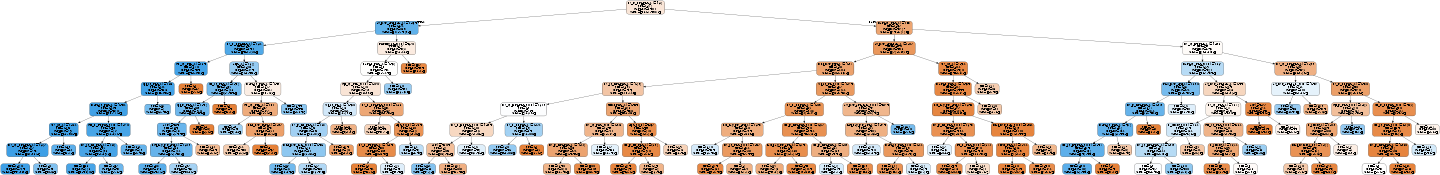

In [138]:
# plotting the tree

dot_data = StringIO()  
export_graphviz(dt_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.set_size('"15,20"')
Image(graph.create_png())

In [139]:
graph.write_pdf("telecom.pdf")

True

In [140]:
dt_gini.feature_importances_.round(3)*100

array([ 0.9,  0. ,  0.3,  0.5,  9.4,  0. ,  1.9,  2.4,  0. ,  0.4,  0. ,
        0.8,  0. ,  0.1,  0. ,  1.1, 59.1,  0.2,  0. ,  0.5,  0.1,  0.4,
        0. ,  0.4,  1.7,  0.4,  2.3,  0. ,  8.2,  0.4,  0. ,  0. ,  0. ,
        0. ,  0.4,  0.1,  0.2,  0. ,  0. ,  0. ,  2.2,  0. ,  0.3,  0. ,
        0. ,  0.5,  0.1,  0.4,  0. ,  0.6,  0. ,  0.3,  0.1,  0. ,  0.2,
        0.2,  0. ,  0.4,  0.1,  0.1,  0. ,  0. ,  0. ,  0.2,  0.6,  0.6,
        0.5,  0. ,  0. ,  0. ,  0.1])

In [141]:
#Identify the Top features in the Decision Tree
#---------------------------------------------------
a=(dict(zip(X.columns, dt_gini.feature_importances_.round(3)*100)))
df_dict=pd.DataFrame(list(a.items()), columns=['col','value'])
df_dict.sort_values(by='value',ascending=False)

,col,value
16,loc_ic_t2m_mou_8,59.1
4,roam_og_mou_8,9.4
28,av_rech_amt_data_8,8.2
7,loc_og_t2f_mou_8,2.4
26,last_day_rch_amt_8,2.3
40,roam_og_mou_good,2.2
6,loc_og_t2m_mou_8,1.9
24,total_rech_num_8,1.7
15,loc_ic_t2t_mou_8,1.1
0,arpu_8,0.9


### Model 6 : Try Random Over Sampling

In [142]:
from imblearn.over_sampling import SMOTE

In [143]:
print("x_train: ", pca_x_train.shape)
print("y_train: ", y_train.shape)
print("x_test: ", pca_x_test.shape)
print("y_test: ", y_test.shape)

x_train:  (21000, 40)
y_train:  (21000,)
x_test:  (9001, 40)
y_test:  (9001,)


In [144]:
print('Before Oversampling')
print("counts of label '1': {}".format(sum(y_train==1)))
print("counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=100)
x_train_res, y_train_res = sm.fit_sample(pca_x_train, y_train.ravel())

print('After Oversampling')
print('shape of x_train: {}'.format(x_train_res.shape))
print('shape of y_train: {} \n'.format(y_train_res.shape))

print("counts of label '1': {}".format(sum(y_train_res==1)))
print("counts of label '0': {}".format(sum(y_train_res==0)))

Before Oversampling
counts of label '1': 1711
counts of label '0': 19289 

After Oversampling
shape of x_train: (38578, 40)
shape of y_train: (38578,) 

counts of label '1': 19289
counts of label '0': 19289


### Running logistic regression with penalty on Oversampled data

In [145]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_cv = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10))),
        penalty='l2',
        scoring='roc_auc',
        random_state=25,
        max_iter=100,
        fit_intercept=True,
        solver='newton-cg',
        tol=1,
        verbose = 2,
        n_jobs = -1)

In [146]:
log_reg_cv.fit(x_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0],
           class_weight=None, cv='warn', dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='warn',
           n_jobs=-1, penalty='l2', random_state=25, refit=True,
           scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

In [147]:
# Testing
log_reg_cv_predict = log_reg_cv.predict(pca_x_test)
print(classification_report(y_test,log_reg_cv_predict))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8271
           1       0.28      0.80      0.41       730

   micro avg       0.81      0.81      0.81      9001
   macro avg       0.63      0.81      0.65      9001
weighted avg       0.92      0.81      0.85      9001



In [148]:
# Printing confusion matrix
print(confusion_matrix(y_test,log_reg_cv_predict))

[[6742 1529]
 [ 144  586]]


In [149]:
print(accuracy_score(y_test,log_reg_cv_predict))

0.8141317631374292


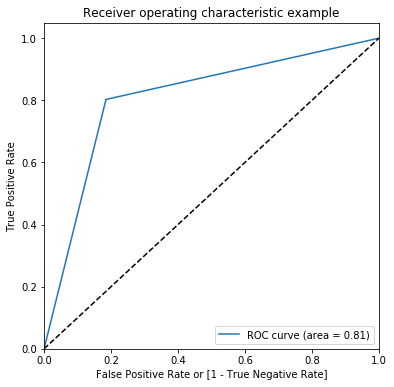

(array([0.        , 0.18486277, 1.        ]),
 array([0.        , 0.80273973, 1.        ]),
 array([2, 1, 0]))

In [150]:
draw_roc(y_test, log_reg_cv_predict)

#### This Oversampling technique does not yield any better result than Random Forest / Decision Tress

## CONCLUSION ::

### We can conclude that Random Forest with tuned hyperparameters yielded the best result as :
    it has highest recall score
    it was able to predict the unbalanced churned customer to a reasonably degree 
    it was also not predicting too many non churned customers to churned ones
    ROC curve had good percentage

### Recommendations to Business for important Variables
-----------------------------------------------------------------------

    From the above graphs and varibales, we can clearly infer that 
        1) incoming calls in the action phase is key for identifying churn customers as the usage during the action phase  decreased drastically when compared to good months (6/7th month)
        2) The other key factor is the roaming outgoing during the action phase is sign of churn
        3) Average recharge amount data and volume (3g) in action phase is way lower than the good phase, so it is also a good indicator
        4) Average revenue per user is also a key indicator for identifying the churn
        5) The number of STD outgoing calls is another factor